This code is about crime data preprocessing with KDE & Violent method. 

## INDEX
1. Extract data in 2018 year 
2. Extract violent data refer to Chicago Police Department
   - Homicide, Criminal Sexual Assault, Robbery, Aggravated Assault, Aggravated Battery
3. Calculate KDE
4. Extrude polulation effect 


## 1. Extract data in 2018 year

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import os
import matplotlib.pyplot as plt
from scipy import stats
#import shap
#import tensorflow
# import pycaret

In [ ]:
import pandas as pd

crime = pd.read_csv("/content/drive/Shareddrives/RABBIT/Dataset/Data_analysis/processed_data_JW/crime_homicide_concated.csv")

In [ ]:
crime

,Case Number,Date,Primary Type,Description,Latitude,Longitude
0,HY411648,09/05/2015 01:30:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,41.815117,-87.670000
1,HY411615,09/04/2015 11:30:00 AM,THEFT,POCKET-PICKING,41.895080,-87.765400
2,HY411595,09/05/2015 12:45:00 PM,NARCOTICS,POSS: HEROIN(BRN/TAN),41.937406,-87.716650
3,HY411610,09/05/2015 01:00:00 PM,ASSAULT,SIMPLE,41.881903,-87.755121
4,HY411435,09/05/2015 10:55:00 AM,BURGLARY,FORCIBLE ENTRY,41.744379,-87.658431
...,...,...,...,...,...,...
7399673,JF393617,09/12/2022 06:56:00 PM,BATTERY,NaN,41.878372,-87.681555
7399674,JF392488,09/12/2022 01:10:00 AM,BATTERY,NaN,41.765568,-87.644995
7399675,JF393682,09/12/2022 07:53:00 PM,BATTERY,NaN,41.764888,-87.624305
7399676,JF392533,09/12/2022 02:30:00 AM,BATTERY,NaN,41.884062,-87.632015


In [ ]:
crime["Primary Type"].unique()

array(['BATTERY', 'THEFT', 'NARCOTICS', 'ASSAULT', 'BURGLARY', 'ROBBERY',
       'OTHER OFFENSE', 'CRIMINAL DAMAGE', 'WEAPONS VIOLATION',
       'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'MOTOR VEHICLE THEFT',
       'SEX OFFENSE', 'INTERFERENCE WITH PUBLIC OFFICER',
       'OFFENSE INVOLVING CHILDREN', 'PUBLIC PEACE VIOLATION',
       'PROSTITUTION', 'GAMBLING', 'CRIM SEXUAL ASSAULT',
       'LIQUOR LAW VIOLATION', 'ARSON', 'STALKING', 'KIDNAPPING',
       'INTIMIDATION', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON - CRIMINAL', 'HUMAN TRAFFICKING', 'OBSCENITY',
       'CRIMINAL SEXUAL ASSAULT', 'PUBLIC INDECENCY',
       'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL', 'HOMICIDE',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'RITUALISM',
       'DOMESTIC VIOLENCE', 'NON-FATAL'], dtype=object)

In [ ]:
crime_location = crime[['Longitude','Latitude','Date', "Primary Type", "Description"]]
crime_location.columns = ['longitude','latitude','year', 'type', 'description']
crime_location = crime_location.dropna()

crime_location

,longitude,latitude,year,type,description
0,-87.670000,41.815117,09/05/2015 01:30:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE
1,-87.765400,41.895080,09/04/2015 11:30:00 AM,THEFT,POCKET-PICKING
2,-87.716650,41.937406,09/05/2015 12:45:00 PM,NARCOTICS,POSS: HEROIN(BRN/TAN)
3,-87.755121,41.881903,09/05/2015 01:00:00 PM,ASSAULT,SIMPLE
4,-87.658431,41.744379,09/05/2015 10:55:00 AM,BURGLARY,FORCIBLE ENTRY
...,...,...,...,...,...
7391887,-87.663051,41.884770,09/04/2022 05:25:00 AM,HOMICIDE,FIRST DEGREE MURDER
7391888,-87.725791,41.885001,08/31/2022 04:50:00 PM,HOMICIDE,FIRST DEGREE MURDER
7391889,-87.620652,41.682299,08/31/2022 09:30:00 AM,HOMICIDE,FIRST DEGREE MURDER
7391890,-87.664283,41.750344,09/01/2022 06:10:00 PM,HOMICIDE,FIRST DEGREE MURDER


In [ ]:
YEAR='2018'

crime_condition = crime_location['year'].astype('str').str.contains(YEAR) 
crime_year = crime_location[crime_condition]

In [ ]:
crime_year

,longitude,latitude,year,type,description
15978,-87.667903,41.896063,08/30/2018 11:50:00 AM,OTHER OFFENSE,TELEPHONE THREAT
16132,-87.690706,41.769400,09/25/2018 03:45:00 PM,ASSAULT,SIMPLE
16184,-87.725954,41.838706,10/30/2018 04:59:00 PM,BATTERY,AGGRAVATED: HANDGUN
16389,-87.773788,41.896551,11/23/2018 01:30:00 AM,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR
74305,-87.674296,42.004384,01/13/2018 08:24:00 PM,BATTERY,AGGRAVATED - HANDGUN
...,...,...,...,...,...
7391864,-87.761498,41.898533,10/27/2018 11:25:00 AM,ASSAULT,AGGRAVATED - HANDGUN
7391866,-87.748168,41.892497,04/16/2018 07:45:00 AM,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - OTHER
7391870,-87.728577,41.854354,08/05/2018 12:23:00 AM,BATTERY,AGGRAVATED - HANDGUN
7391871,-87.721499,41.865651,08/12/2018 02:43:00 PM,BATTERY,AGGRAVATED - HANDGUN


## 2. Extract violent data refer to Chicago Police Department
- refer : https://www.ilga.gov/legislation/ilcs/ilcs2.asp?ChapterID=53 

In [ ]:
crime_condition_1 = crime_year['type'].astype('str').str.contains('HOMICIDE')
crime_condition_2 = crime_year['type'].astype('str').str.contains('CRIMINAL SEXUAL ASSAULT')
crime_condition_3 = crime_year['type'].astype('str').str.contains('CRIM SEXUAL ASSAULT')
crime_condition_4 = crime_year['type'].astype('str').str.contains('ROBBERY')
crime_condition_5 = crime_year['type'].astype('str').str.contains('ASSAULT') & crime_year['description'].astype('str').str.contains('AGGRAVATED') & ~crime_year['description'].astype('str').str.contains('NON-AGGRAVATED')
crime_condition_6 = crime_year['type'].astype('str').str.contains('BATTERY') & crime_year['description'].astype('str').str.contains('AGGRAVATED') & ~crime_year['description'].astype('str').str.contains('NON-AGGRAVATED')


In [ ]:
crime_year_v1 = crime_year[crime_condition_1 | crime_condition_2 | crime_condition_3 | crime_condition_4 | crime_condition_5 | crime_condition_6]

In [ ]:
crime_year_v1

,longitude,latitude,year,type,description
16184,-87.725954,41.838706,10/30/2018 04:59:00 PM,BATTERY,AGGRAVATED: HANDGUN
74305,-87.674296,42.004384,01/13/2018 08:24:00 PM,BATTERY,AGGRAVATED - HANDGUN
74380,-87.733867,41.909336,02/13/2018 05:51:00 PM,ROBBERY,ATTEMPT ARMED - KNIFE / CUTTING INSTRUMENT
74406,-87.745797,41.909631,02/14/2018 09:33:00 PM,ASSAULT,AGGRAVATED - HANDGUN
74643,-87.738443,41.961283,03/19/2018 03:57:00 AM,ROBBERY,ARMED - HANDGUN
...,...,...,...,...,...
7391864,-87.761498,41.898533,10/27/2018 11:25:00 AM,ASSAULT,AGGRAVATED - HANDGUN
7391866,-87.748168,41.892497,04/16/2018 07:45:00 AM,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - OTHER
7391870,-87.728577,41.854354,08/05/2018 12:23:00 AM,BATTERY,AGGRAVATED - HANDGUN
7391871,-87.721499,41.865651,08/12/2018 02:43:00 PM,BATTERY,AGGRAVATED - HANDGUN


In [ ]:
types = crime_year_v1['type'].unique()
types

array(['BATTERY', 'ROBBERY', 'ASSAULT', 'CRIMINAL SEXUAL ASSAULT',
       'CRIM SEXUAL ASSAULT', 'HOMICIDE'], dtype=object)

## 3. Calculate KDE 

In [ ]:
crime_df = crime_year_v1

In [ ]:
crime_df = crime_df[(crime_df["longitude"] <= -87.5) & (crime_df["longitude"] >= -88)]
crime_df = crime_df[(crime_df["latitude"] <= 42.1) & (crime_df["latitude"] >= 41.6)]

'\ncrime_location = crime_location[(crime_location["longitude"] < -87.5) & (crime_location["longitude"] > -88)]\ncrime_location = crime_location[(crime_location["latitude"] < 42.1) & (crime_location["latitude"] > 41.6)]\n\n'

In [ ]:
def get_f(location):
    x = location["longitude"]
    y = location["latitude"]

    xmin = -88
    xmax = -87.5
    ymin = 41.6
    ymax = 42.1

    print(xmin, xmax, ymin, ymax)
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)

    f = np.reshape(kernel(positions).T, xx.shape)
    
    return f


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import os
import matplotlib.pyplot as plt
from scipy import stats
#import shap
#import tensorflow
# import pycaret

In [ ]:
crime_df

,longitude,latitude,year,type,description
16184,-87.725954,41.838706,10/30/2018 04:59:00 PM,BATTERY,AGGRAVATED: HANDGUN
74305,-87.674296,42.004384,01/13/2018 08:24:00 PM,BATTERY,AGGRAVATED - HANDGUN
74380,-87.733867,41.909336,02/13/2018 05:51:00 PM,ROBBERY,ATTEMPT ARMED - KNIFE / CUTTING INSTRUMENT
74406,-87.745797,41.909631,02/14/2018 09:33:00 PM,ASSAULT,AGGRAVATED - HANDGUN
74643,-87.738443,41.961283,03/19/2018 03:57:00 AM,ROBBERY,ARMED - HANDGUN
...,...,...,...,...,...
7391864,-87.761498,41.898533,10/27/2018 11:25:00 AM,ASSAULT,AGGRAVATED - HANDGUN
7391866,-87.748168,41.892497,04/16/2018 07:45:00 AM,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - OTHER
7391870,-87.728577,41.854354,08/05/2018 12:23:00 AM,BATTERY,AGGRAVATED - HANDGUN
7391871,-87.721499,41.865651,08/12/2018 02:43:00 PM,BATTERY,AGGRAVATED - HANDGUN


In [ ]:
crime_f = get_f(crime_df)

-88 -87.5 41.6 42.1


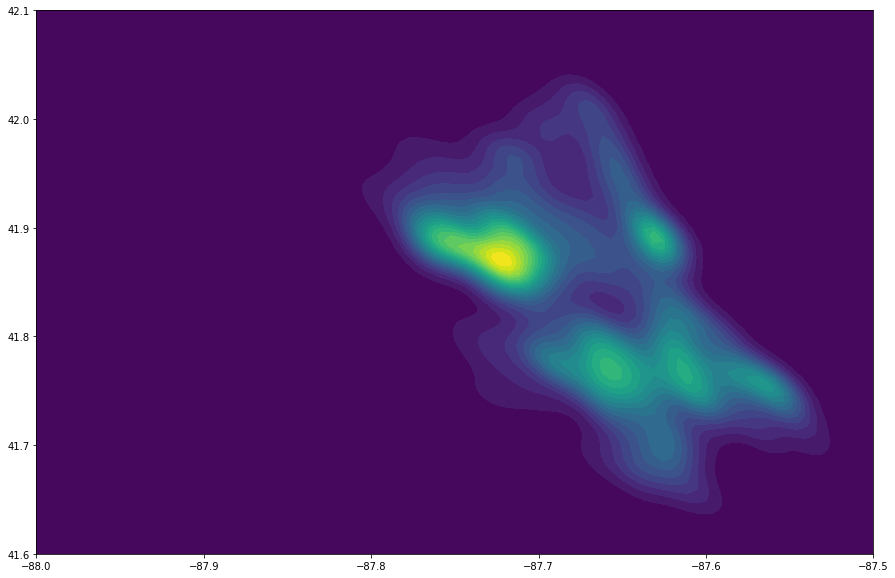

In [ ]:
xmin = -88
xmax = -87.5
ymin = 41.6
ymax = 42.1

xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])

plt.figure(figsize=(15,10))

plt.contourf(xx,yy,crime_f,25)


## 4. Extrude polulation effect 


In [ ]:
PATH = '/content/drive/Shareddrives/RABBIT/Dataset'

In [ ]:
chicago_polygon = pd.read_csv(os.path.join(PATH,'Data_analysis/processed_data_JW/chicago_zipcode_polygon.csv'))
chicago_location = chicago_polygon[['the_geom','ZIP','SHAPE_AREA']]
vectors_list = []
count = 0
for vector_set in chicago_polygon['the_geom']:
  tmp = []
  vector_set = vector_set.replace("(","")
  vector_set = vector_set.replace(")","")
  for index, vector in enumerate(vector_set[13:].split(",")):
    if index == 0:
      longitude = vector.split(" ")[0]
      latitude = vector.split(" ")[1]
      tmp.append([float(longitude), float(latitude)])
    else:

      longitude = vector.split(" ")[1]
      latitude = vector.split(" ")[2]
      tmp.append([float(longitude), float(latitude)])

    
  count += 1
  vectors_list.append(tmp)

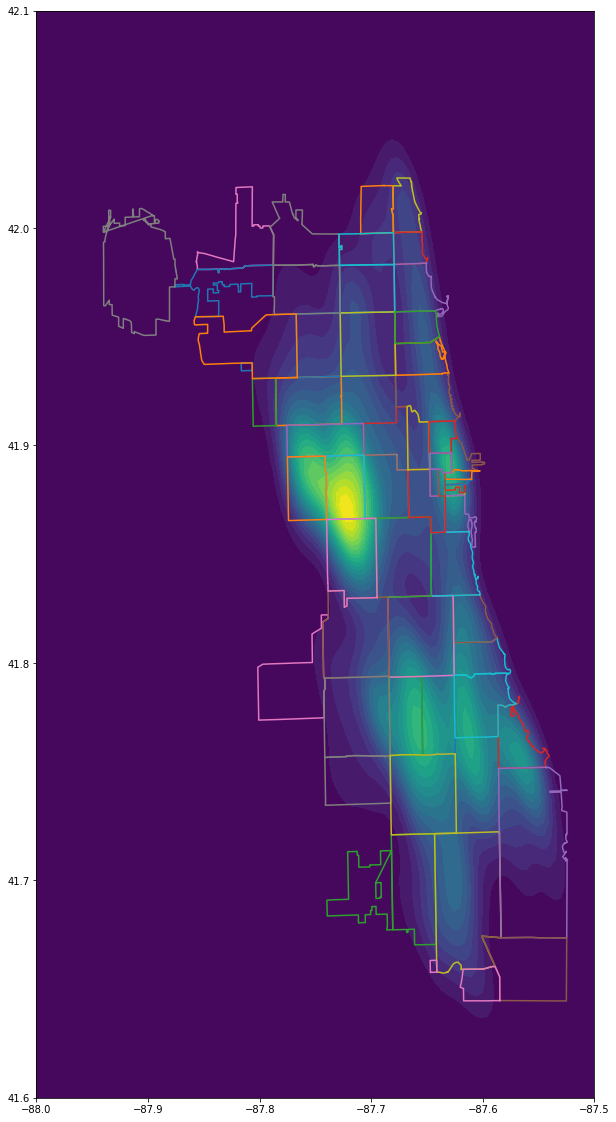

In [ ]:
plt.figure(figsize=(10,20))
plt.contourf(xx,yy,crime_f, 25)
for i in range(60):
  xs, ys = zip(*vectors_list[i])

  plt.plot(xs,ys) 
plt.show() # if you need...

In [ ]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

data_list = []
data_list.append(np.squeeze((np.reshape(xx,(10000,1)))).T)
data_list.append(np.squeeze((np.reshape(yy,(10000,1)))).T)
data_list.append(np.squeeze((np.reshape(crime_f,(10000,1)))).T)
crime_density_vertex = pd.DataFrame(data_list).T



In [ ]:
crime_density_vertex.columns = ['longitude','latitude','crime_density']

In [ ]:
len(crime_density_vertex['crime_density'].unique())

10000

In [ ]:
vertex_zipcode_list=  []
zipcode_area_list = []
for vertex in crime_density_vertex.itertuples():
  x = vertex.longitude 
  y = vertex.latitude
  z = vertex.crime_density

  isbreak = False
  for polygon_vertex_list, zipcode, area in zip(vectors_list,chicago_polygon['ZIP'], chicago_polygon['SHAPE_AREA']):
    if Polygon(polygon_vertex_list).contains(Point(x,y)):
      vertex_zipcode_list.append(zipcode)
      zipcode_area_list.append(area)
      isbreak = True
      break

  if isbreak is False:
    vertex_zipcode_list.append(0)
    zipcode_area_list.append(0)

crime_density_vertex['zipcode'] = vertex_zipcode_list
crime_density_vertex['area'] = zipcode_area_list



In [ ]:
crime_density_vertex['population'] = 0
crime_density_vertex

,longitude,latitude,crime_density,zipcode,area,population
0,-88.0,41.600000,1.031309e-261,0,0.0,0
1,-88.0,41.605051,1.322336e-256,0,0.0,0
2,-88.0,41.610101,1.429167e-251,0,0.0,0
3,-88.0,41.615152,1.302005e-246,0,0.0,0
4,-88.0,41.620202,9.998412e-242,0,0.0,0
...,...,...,...,...,...,...
9995,-87.5,42.079798,1.911274e-113,0,0.0,0
9996,-87.5,42.084848,1.970722e-116,0,0.0,0
9997,-87.5,42.089899,1.720411e-119,0,0.0,0
9998,-87.5,42.094949,1.270089e-122,0,0.0,0


In [ ]:
PATH = '/content/drive/Shareddrives/RABBIT/Dataset'

population_data = pd.read_csv(os.path.join(PATH,'Data_analysis/processed_data_DY/Chicago_Population_Counts.csv'))
population_data_2018 = population_data[['Population - Total','Year', 'Longitude','Latitude','Geography']]
population_data_2018.columns = ['population','year','longitude','latitude','zipcode']
population_data_2018 = population_data_2018[population_data_2018['year']==2018].iloc[1:,:]
population_data_2018

,population,year,longitude,latitude,zipcode
1,"14,675",2018,-87.622130,41.885310,60601
2,"1,244",2018,-87.629149,41.883073,60602
3,"1,174",2018,-87.625510,41.880188,60603
4,782,2018,-87.628461,41.878095,60604
5,"27,519",2018,-87.617228,41.867567,60605
6,"3,101",2018,-87.637349,41.882066,60606
7,"29,591",2018,-87.651596,41.874932,60607
8,"79,205",2018,-87.672388,41.846223,60608
9,"61,495",2018,-87.656935,41.812680,60609
10,"39,019",2018,-87.631940,41.906844,60610


In [ ]:
for zipcode_info in population_data_2018.itertuples():
  condition = crime_density_vertex['zipcode'] == int(zipcode_info.zipcode)
  crime_density_vertex.loc[crime_density_vertex[condition].index, ['population']] = int(zipcode_info.population.replace(",",""))

In [ ]:
import math
crime_density_vertex['adjust_crime_density'] = 0

for data_tuple in crime_density_vertex.itertuples():
  if data_tuple.population == 0:
    pass
  else:
    if data_tuple.crime_density / data_tuple.population != 0:
      crime_density_vertex.loc[data_tuple.Index, 'adjust_crime_density'] = data_tuple.crime_density / (data_tuple.population / data_tuple.area )


In [ ]:
crime_density_vertex

,longitude,latitude,crime_density,zipcode,area,population,adjust_crime_density
0,-88.0,41.600000,1.031309e-261,0,0.0,0,0.0
1,-88.0,41.605051,1.322336e-256,0,0.0,0,0.0
2,-88.0,41.610101,1.429167e-251,0,0.0,0,0.0
3,-88.0,41.615152,1.302005e-246,0,0.0,0,0.0
4,-88.0,41.620202,9.998412e-242,0,0.0,0,0.0
...,...,...,...,...,...,...,...
9995,-87.5,42.079798,1.911274e-113,0,0.0,0,0.0
9996,-87.5,42.084848,1.970722e-116,0,0.0,0,0.0
9997,-87.5,42.089899,1.720411e-119,0,0.0,0,0.0
9998,-87.5,42.094949,1.270089e-122,0,0.0,0,0.0


In [ ]:
new_f = np.reshape(list(crime_density_vertex['adjust_crime_density']),(100,100))
print(new_f)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


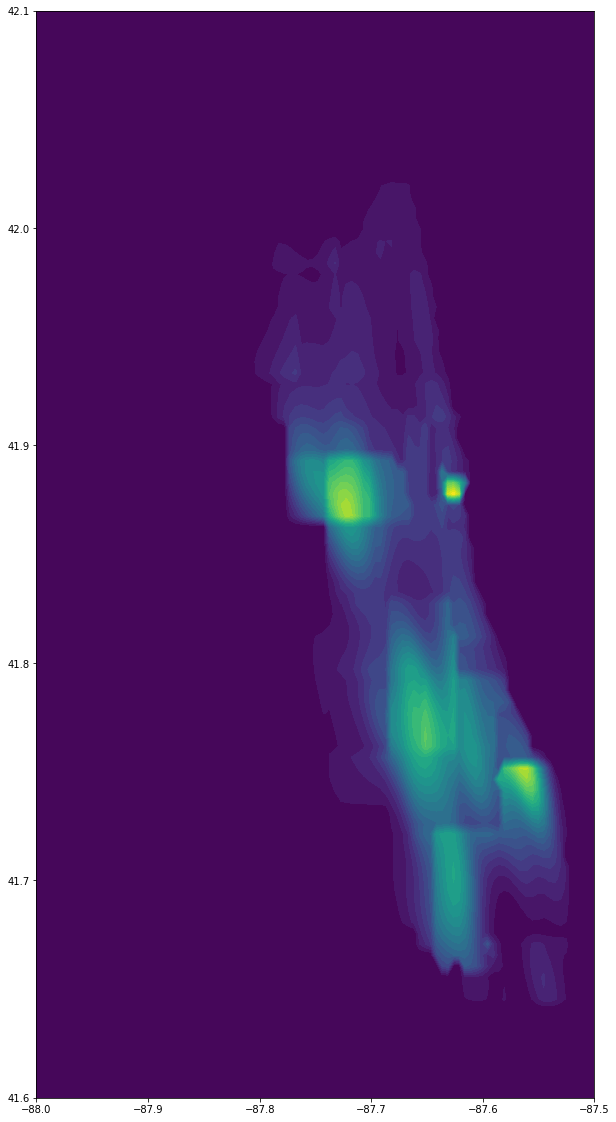

In [ ]:
plt.figure(figsize=(10,20))
plt.contourf(xx,yy,new_f,25)

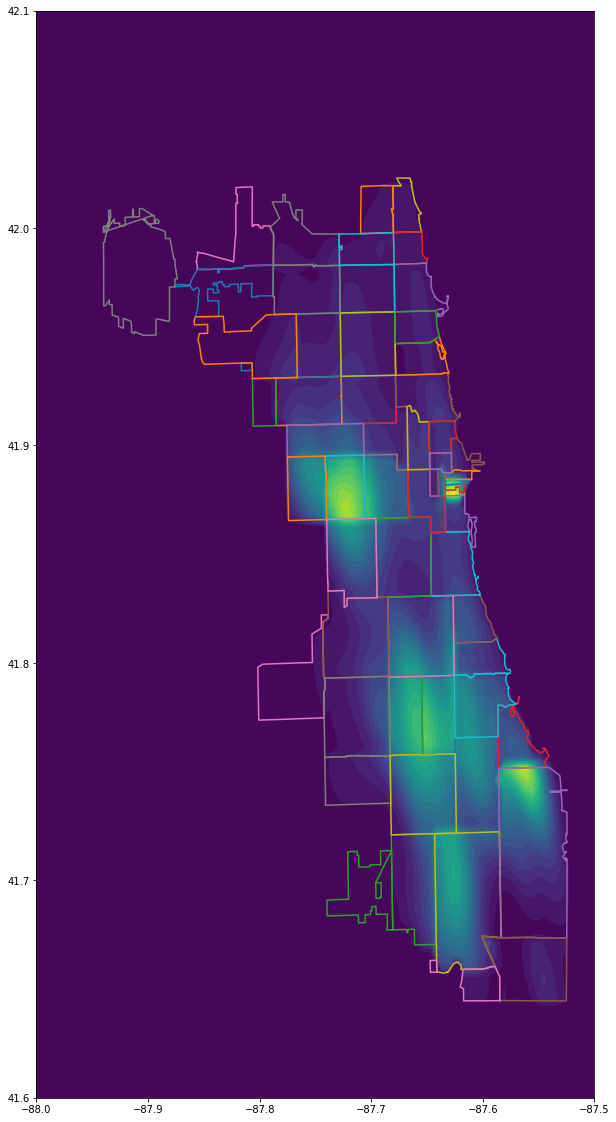

In [ ]:
plt.figure(figsize=(10,20))
plt.contourf(xx,yy,new_f, 25)
for i in range(60):
  xs, ys = zip(*vectors_list[i])

  plt.plot(xs,ys) 
plt.show()